# Sistemas de ecuaciones lineales

Comenzamos por un caso sencillo:

$$
\begin{align}
x-2y &= 1
\\
3x+2y &= 11
\end{align}
$$

## 1. Primera solución, método gráfico

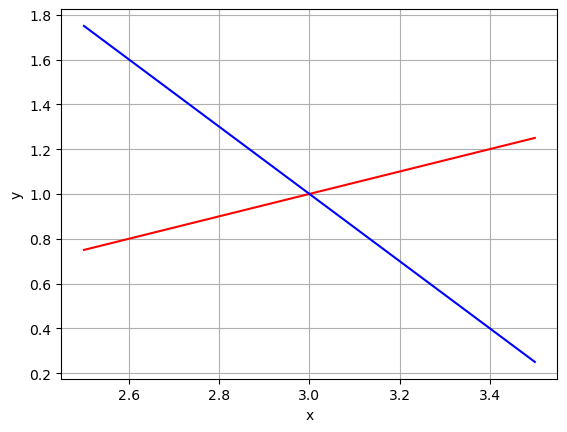

In [10]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(2.5,3.5,100)

y1 = (x-1)/2
y2 = (11-3*x)/2

plt.plot(x,y1,'r-')
plt.plot(x,y2, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

In [30]:
import scipy.linalg as scl
a = np.array([
    [1., -2.],
    [3., 2.]
   ])

b = np.array([[1],
              [11]])

x = scl.solve(a,b)

for i in range(len(x)):
    print(f'x[{i+1}] = {x[i,0]:.2f}')

# si quereos printear llaves y no corchetes hay que duplicar:

for i in range(len(x)):
    print(f'x{{{i+1}}} = {x[i,0]:.2f}')


x[1] = 3.00
x[2] = 1.00
x{1} = 3.00
x{2} = 1.00


Otra forma de resolverlo es factorizar la matriz del sistema como una matriz triangular inferior y otra superior $$M=LU$$ de forma que se pueda aplicar eliminación gaussiana.

In [34]:
import scipy.linalg as scl
a = np.array([
    [1., -2.],
    [3., 2.]
   ])

b = np.array([[1],
              [11]])

x = np.dot(scl.inv(a),b)

for i in range(len(x)):
    print(f'x[{i+1}] = {x[i,0]:.2f}')

x[1] = 3.00
x[2] = 1.00


# Mínimos cuadrados

ValueError: x and y must have same first dimension, but have shapes (100,) and (4, 100)

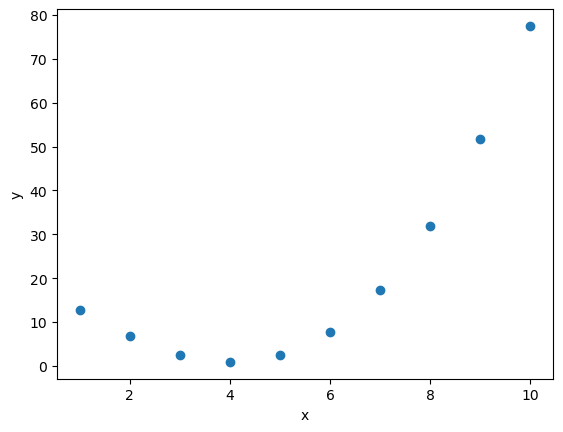

In [62]:
import numpy as np

data = np.loadtxt('data2c.txt')

x, y, s = data.T

plt.plot(x,y,'o')
plt.xlabel('x')
plt.ylabel('y')

N = len(x)

n = 3 # orden del polimonmio

a = np.zeros((n+1, N))
b = (y/s).T
for i in range(n+1):

    a[i] = x**i/s

C = np.dot(a,a.T)
B = np.dot(a,b)

A = np.dot(np.linalg.inv(C), B).T #coeficientes del polinomio

xp = np.linspace(min(x), max(x), 100)
yp = [A[i]*xp**i for i in range(n+1)]

plt.plot(xp,yp)

